In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
international_report_departures = pd.read_csv("International_Report_Departures.csv")
international_report_departures.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


Column Name   |  Description                                              |  Type
--------------|-----------------------------------------------------------|--------
data_dte      |  Data Date                                                |  Date & Time
Year          |  Data Year                                                |  Number
Month         |  Data Month                                               |  Number
usg_apt_id    |  US Gateway Airport ID - assigned by US DOT to identify an airport  |  Number
usg_apt       |  US Gateway Airport Code - usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code  |  Plain Text
usg_wac       |  US Gateway World Area Code - assigned by US DOT to represent a geographic territory  |  Number
fg_apt_id     |  Foreign Gateway Airport ID - assigned by US DOT to identify an airport  |  Number
fg_apt        |  Foreign Gateway Airport Code - usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code  |  Plain Text
fg_wac        |  Foreign Gateway World Area Code - assigned by US DOT to represent a geographic territory  |  Number
airlineid     |  Airline ID - assigned by US DOT to identify an air carrier  |  Number
carrier       |  IATA-assigned air carrier code. If carrier has no IATA code, ICAO- or FAA-assigned code may be used  |  Plain Text
carriergroup  |  Carrier Group Code - 1 denotes US domestic air carriers, 0 denotes foreign air carriers  |  Number
type          |  Defines the type of the four metrics in this report      |  Plain Text
Scheduled     |  Metric flown by scheduled service operations              |  Number
Charter       |  Metric flown by charter operations                        |  Number
Total         |  Total Metric flown by scheduled service and charter operations  |  Number


In [3]:
international_report_departures.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [4]:
international_report_departures.dtypes

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

In [5]:
international_report_departures['data_dte']=pd.to_datetime(international_report_departures['data_dte']) 

Column Name | Description                                                | Type
------------|------------------------------------------------------------|------
data_dte    | Data Date                                                  | Date & Time
Year        | Data Year                                                  | Number
Month       | Data Month                                                 | Number
usg_apt_id  | US Gateway Airport ID - assigned by US DOT to identify an airport | Number
usg_apt     | US Gateway Airport Code - usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code | Plain Text
usg_wac     | US Gateway World Area Code - assigned by US DOT to represent a geographic territory | Number
fg_apt_id   | Foreign Gateway Airport ID - assigned by US DOT to identify an airport | Number
fg_apt      | Foreign Gateway Airport Code - usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code | Plain Text
fg_wac      | Foreign Gateway World Area Code - assigned by US DOT to represent a geographic territory | Number
airlineid   | Airline ID - assigned by US DOT to identify an air carrier | Number
carrier     | IATA-assigned air carrier code. If carrier has no IATA code, ICAO- or FAA-assigned code may be used | Plain Text
carriergroup| Carrier Group Code - 1 denotes US domestic air carriers, 0 denotes foreign air carriers | Number
type        | Defines the type of the four metrics in this report         | Plain Text
Scheduled   | Metric flown by scheduled service operations                | Number
Charter     | Metric flown by charter operations                          | Number
Total       | Total Metric flown by scheduled service and charter operations | Number


In [6]:
international_report_departures.shape

(930808, 16)

In [7]:
international_report_departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data_dte      930808 non-null  datetime64[ns]
 1   Year          930808 non-null  int64         
 2   Month         930808 non-null  int64         
 3   usg_apt_id    930808 non-null  int64         
 4   usg_apt       930808 non-null  object        
 5   usg_wac       930808 non-null  int64         
 6   fg_apt_id     930808 non-null  int64         
 7   fg_apt        930808 non-null  object        
 8   fg_wac        930808 non-null  int64         
 9   airlineid     930808 non-null  int64         
 10  carrier       927753 non-null  object        
 11  carriergroup  930808 non-null  int64         
 12  type          930808 non-null  object        
 13  Scheduled     930808 non-null  int64         
 14  Charter       930808 non-null  int64         
 15  Total         930

In [8]:
international_report_departures.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


In [9]:
international_report_passengers = pd.read_csv("International_Report_Passengers.csv")
international_report_passengers.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [10]:
international_report_passengers['data_dte']=pd.to_datetime(international_report_passengers['data_dte']) 

In [11]:
international_report_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680985 entries, 0 to 680984
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data_dte      680985 non-null  datetime64[ns]
 1   Year          680985 non-null  int64         
 2   Month         680985 non-null  int64         
 3   usg_apt_id    680985 non-null  int64         
 4   usg_apt       680985 non-null  object        
 5   usg_wac       680985 non-null  int64         
 6   fg_apt_id     680985 non-null  int64         
 7   fg_apt        680985 non-null  object        
 8   fg_wac        680985 non-null  int64         
 9   airlineid     680985 non-null  int64         
 10  carrier       678188 non-null  object        
 11  carriergroup  680985 non-null  int64         
 12  type          680985 non-null  object        
 13  Scheduled     680985 non-null  int64         
 14  Charter       680985 non-null  int64         
 15  Total         680

In [12]:
international_report_passengers.dtypes

data_dte        datetime64[ns]
Year                     int64
Month                    int64
usg_apt_id               int64
usg_apt                 object
usg_wac                  int64
fg_apt_id                int64
fg_apt                  object
fg_wac                   int64
airlineid                int64
carrier                 object
carriergroup             int64
type                    object
Scheduled                int64
Charter                  int64
Total                    int64
dtype: object

In [13]:
international_report_passengers.shape

(680985, 16)

In [14]:
international_report_passengers.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


In [15]:
print("Missing Values in Departures Dataset:")
print(international_report_departures.isnull().sum())

print("\nMissing Values in Passengers Dataset:")
print(international_report_passengers.isnull().sum())

Missing Values in Departures Dataset:
data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

Missing Values in Passengers Dataset:
data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64


| Question                                                                                            |
|-----------------------------------------------------------------------------------------------------|
| What is the overall trend in the total number of flights over the years?                            |
| Which year had the highest total number of flights? Was there any specific reason for this increase? |
| What are the top 10 busiest airports based on the total number of flights?                          |
| Is there a difference in the number of flights between domestic and foreign carriers?               |
| Which airline had the highest number of flights? Have there been any shifts in the dominance of airlines over the years? |



# What are the top 10 busiest airports based on the total number of flights?

In [16]:
Top_10_busiest_airports=international_report_departures.groupby('usg_apt')['Total'].sum().nlargest(10)
print("Top 10 Busiest Airports:")
print(Top_10_busiest_airports)

Top 10 Busiest Airports:
usg_apt
MIA    5016561
JFK    3780640
LAX    3013661
ORD    2366023
EWR    2042525
IAH    2014828
ATL    1595534
DFW    1386314
SFO    1350642
SJU    1200253
Name: Total, dtype: int64


In [17]:

monthly_total_flights=international_report_passengers.groupby(['Month','Year'])['Total'].sum().nlargest(10)
print("Monthly Total of Flights:")
print(monthly_total_flights)

Monthly Total of Flights:
Month  Year
7      2018    24314837
       2019    24177588
8      2019    23494045
       2018    23370960
7      2017    23350538
6      2019    22981519
8      2017    22626894
6      2018    22612169
7      2016    22029902
5      2019    21241483
Name: Total, dtype: int64


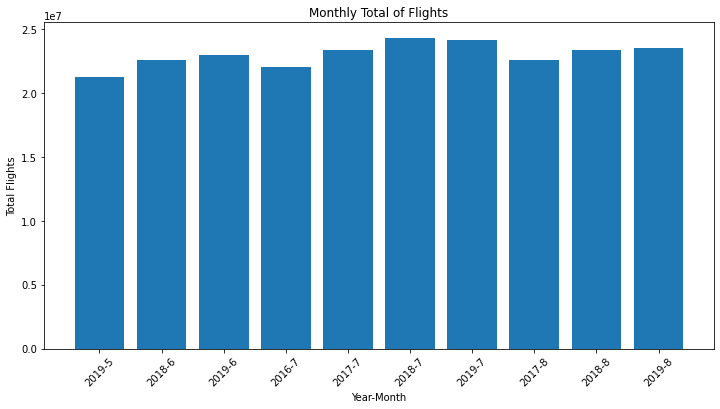

In [18]:
# Assuming you have the data in a pandas DataFrame named 'monthly_total_flights'
sorted_flights = monthly_total_flights.sort_index()

plt.figure(figsize=(12, 6))
plt.bar(sorted_flights.index.get_level_values('Year').astype(str) + '-' + sorted_flights.index.get_level_values('Month').astype(str), sorted_flights.values)
plt.xlabel('Year-Month')
plt.ylabel('Total Flights')
plt.title('Monthly Total of Flights')
plt.xticks(rotation=45)
plt.show()


# What is the overall trend in the total number of flights over the years?

In [19]:
yearly_total_flights=international_report_passengers.groupby(['Year'])['Total'].sum()
print("Yearly Total of Flights:")
print(yearly_total_flights)

Yearly Total of Flights:
Year
1990     84425428
1991     81771514
1992     89642833
1993     94140075
1994     98550584
1995    105521802
1996    113248651
1997    120323779
1998    125299971
1999    133208907
2000    143711273
2001    130612087
2002    125464008
2003    125808125
2004    141373425
2005    150109584
2006    155014709
2007    160847217
2008    160600210
2009    151139939
2010    159804972
2011    166461939
2012    173773201
2013    182444012
2014    191919055
2015    204946353
2016    217451671
2017    228961494
2018    241413919
2019    244063957
2020     43951986
Name: Total, dtype: int64


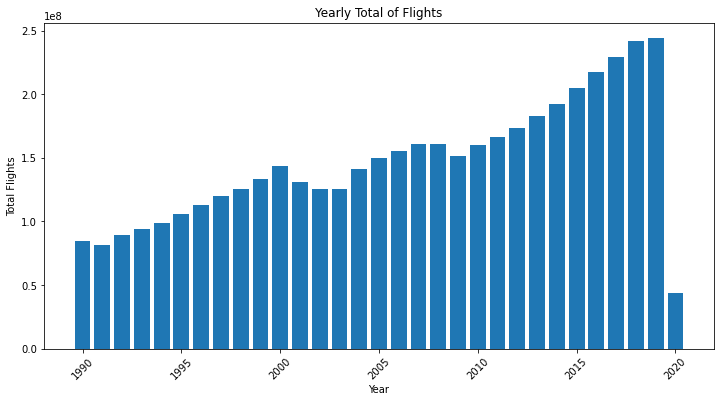

In [20]:
# Assuming you have the data in a pandas DataFrame named 'monthly_total_flights'
sorted_flights_yearly = yearly_total_flights.sort_index()

plt.figure(figsize=(12, 6))
plt.bar(sorted_flights_yearly.index.get_level_values('Year') , sorted_flights_yearly.values)
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.title('Yearly Total of Flights')
plt.xticks(rotation=45)
plt.show()

# Which year had the highest total number of flights? Was there any specific reason for this increase?

In [21]:
# Find the year with the highest total number of flights
year_with_max_flights = yearly_total_flights.idxmax()

In [22]:
year_with_max_flights

2019

In [23]:
yearly_total_flights.idxmax()

2019

# Is there a difference in the number of flights between domestic and foreign carriers?

In [24]:
carrier_total_flights=international_report_departures.groupby(['carriergroup'])['Total'].sum()
print("Carrier Total of Flights:")
print(carrier_total_flights)

Carrier Total of Flights:
carriergroup
0    16258603
1    22843398
Name: Total, dtype: int64


# Which airline had the highest number of flights? Have there been any shifts in the dominance of airlines over the years?

In [25]:
airline_total_flights=international_report_departures.groupby(['airlineid'])['Total'].sum().nlargest(1)
print("Airline Total of Flights:")
print(airline_total_flights)

Airline Total of Flights:
airlineid
19805    4419838
Name: Total, dtype: int64
